<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/2_LR_Rhode_Island_Policing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ri=pd.read_csv('/content/police.csv')

In [3]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
ri.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
ri.dtypes

In [ ]:
ri.isnull().sum()

In [8]:
ri.drop('county_name', axis='columns', inplace=True)

In [9]:
ri.driver_gender.value_counts(normalize=True)

M    0.727901
F    0.272099
Name: driver_gender, dtype: float64

In [10]:
ri[ri.violation=='Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [11]:
ri.loc[ri.violation=='Speeding', 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [12]:
ri.loc[ri.driver_gender=='M', 'violation'].value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [13]:
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [14]:
#Does gender affects who gets searched during a stop?
ri.groupby('driver_gender').search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: search_conducted, dtype: float64

In [15]:
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [16]:
ri.search_conducted.mean()

0.03483720473942948

In [17]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [18]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

In [19]:
#why is search_type missing so often?
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [20]:
ri[ri.search_conducted==False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [21]:
ri[ri.search_conducted==True].search_type.value_counts(normalize=True)

Incident to Arrest                                          0.381414
Probable Cause                                              0.278786
Inventory                                                   0.068836
Reasonable Suspicion                                        0.061640
Protective Frisk                                            0.050375
Incident to Arrest,Inventory                                0.040363
Incident to Arrest,Probable Cause                           0.033166
Probable Cause,Reasonable Suspicion                         0.023467
Incident to Arrest,Inventory,Probable Cause                 0.010638
Incident to Arrest,Protective Frisk                         0.010325
Probable Cause,Protective Frisk                             0.010325
Inventory,Probable Cause                                    0.006884
Incident to Arrest,Reasonable Suspicion                     0.004068
Inventory,Protective Frisk                                  0.003442
Incident to Arrest,Inventory,Prote

In [26]:
combined=ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime']= pd.to_datetime(combined)
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [27]:
ri.stop_datetime.dt.year

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_datetime, Length: 91741, dtype: int64

In [28]:
ri.drugs_related_stop.mean()

0.008883705213590434

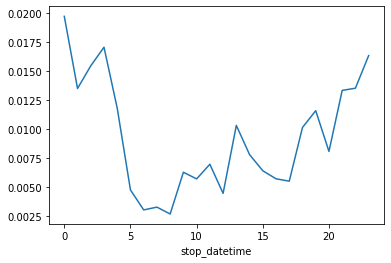

In [29]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

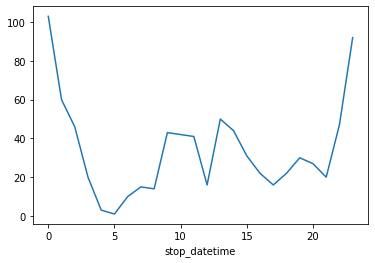

In [30]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

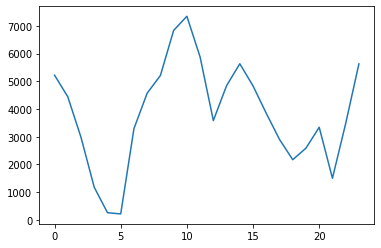

In [31]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe69c613b00>,
      dtype=object)

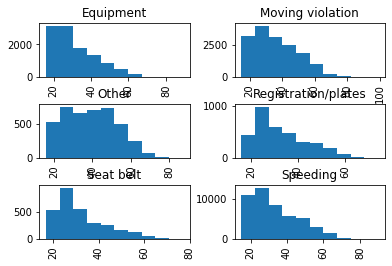

In [33]:
ri.hist('driver_age', by='violation')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe69c371630>,
      dtype=object)

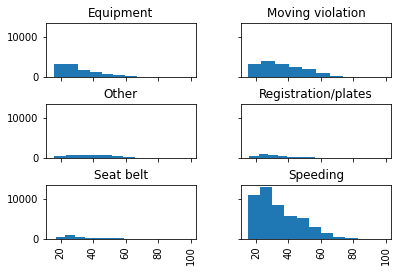

In [34]:

ri.hist('driver_age', by='violation', sharex=True, sharey=True)